Conversion by Contact Method:
     contact      mean  count
0   cellular  0.149189  29285
1  telephone  0.134205   2906
2    unknown  0.040707  13020

Conversion by Month:
   month      mean  count
0    apr  0.196794   2932
1    aug  0.110133   6247
2    dec  0.467290    214
3    feb  0.166478   2649
4    jan  0.101212   1403
5    jul  0.090935   6895
6    jun  0.102228   5341
7    mar  0.519916    477
8    may  0.067195  13766
9    nov  0.101511   3970
10   oct  0.437669    738
11   sep  0.464594    579

Conversion by Campaign Frequency:
        campaign      mean  count campaign_range
0  (-0.001, 1.0]  0.145976  17544              0
1     (1.0, 2.0]  0.112035  12505              1
2     (2.0, 3.0]  0.111936   5521              2
3     (3.0, 5.0]  0.086266   5286              3
4    (5.0, 10.0]  0.065211   3159              4
5   (10.0, 20.0]  0.045168    952              5
6   (20.0, 63.0]  0.016393    244              6

Conversion by Previous Outcome:
  poutcome      mean  count
2 

C:\Users\dungb\AppData\Local\Temp\ipykernel_10128\2525166940.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  campaign_conversion = df.groupby(campaign_bins)['converted'].agg(['mean', 'count']).reset_index()


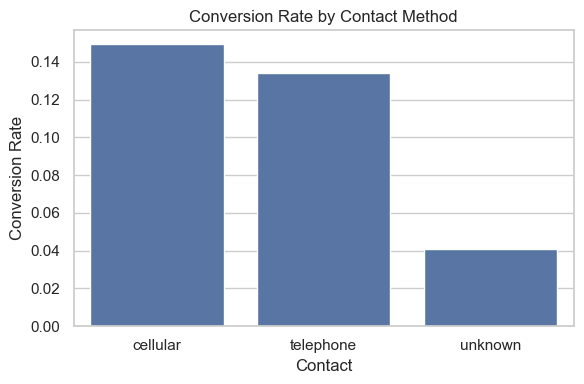

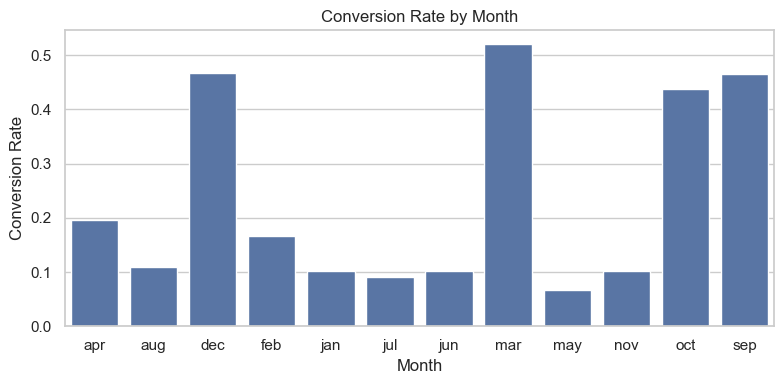

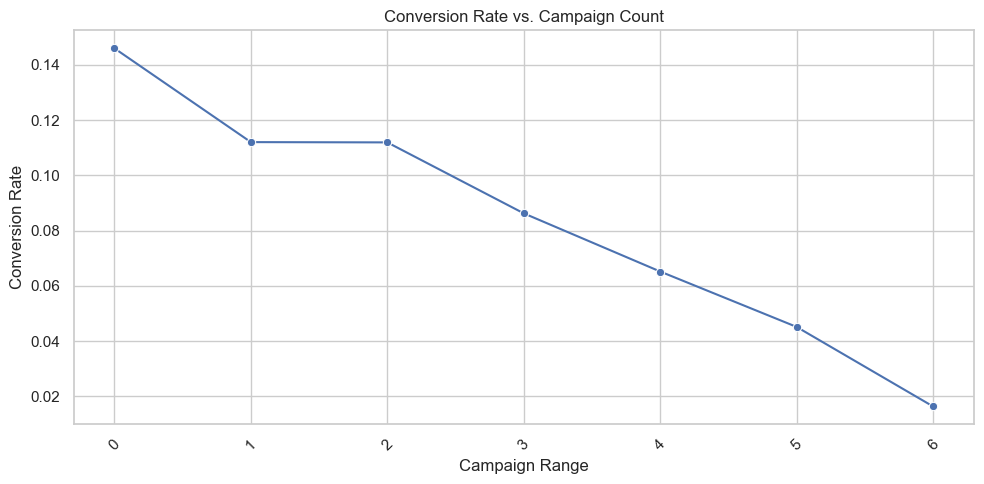

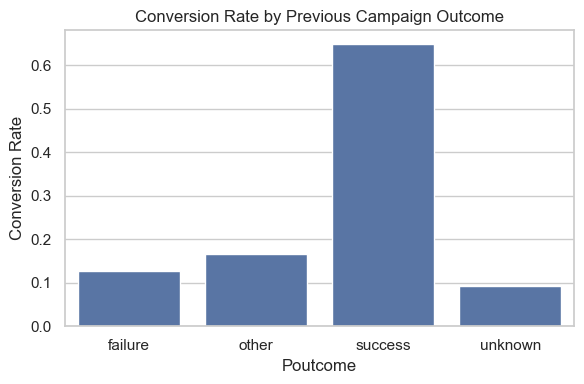

In [8]:
# Project 3: Marketing Channel Attribution & Contact Strategy Optimization

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('../data/bank-full.csv', sep=';')

# Add binary conversion column
df['converted'] = df['y'].map({'yes': 1, 'no': 0})

# 1. Conversion by contact method
contact_conversion = df.groupby('contact')['converted'].agg(['mean', 'count']).reset_index()
print("Conversion by Contact Method:")
print(contact_conversion.sort_values(by='mean', ascending=False))

# 2. Conversion by month
month_conversion = df.groupby('month')['converted'].agg(['mean', 'count']).reset_index()
print("\nConversion by Month:")
print(month_conversion.sort_values(by='month'))

# 3. Conversion by number of campaign contacts
campaign_bins = pd.cut(df['campaign'], bins=[0, 1, 2, 3, 5, 10, 20, df['campaign'].max()], include_lowest=True)
campaign_conversion = df.groupby(campaign_bins)['converted'].agg(['mean', 'count']).reset_index()
campaign_conversion['campaign_range'] = campaign_conversion.index.astype(str)
print("\nConversion by Campaign Frequency:")
print(campaign_conversion)

# 4. Conversion by previous outcome
poutcome_conversion = df.groupby('poutcome')['converted'].agg(['mean', 'count']).reset_index()
print("\nConversion by Previous Outcome:")
print(poutcome_conversion.sort_values(by='mean', ascending=False))

# 5. Visualization: Contact Method
plt.figure(figsize=(6, 4))
sns.barplot(data=contact_conversion, x='contact', y='mean')
plt.title('Conversion Rate by Contact Method')
plt.ylabel('Conversion Rate')
plt.xlabel('Contact')
plt.tight_layout()
plt.show()

# 6. Visualization: Conversion Rate by Month
plt.figure(figsize=(8, 4))
sns.barplot(data=month_conversion.sort_values('month'), x='month', y='mean')
plt.title('Conversion Rate by Month')
plt.ylabel('Conversion Rate')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

# 7. Visualization: Campaign Contacts
plt.figure(figsize=(10, 5))
sns.lineplot(data=campaign_conversion, x='campaign_range', y='mean', marker='o')
plt.title('Conversion Rate vs. Campaign Count')
plt.ylabel('Conversion Rate')
plt.xlabel('Campaign Range')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 8. Visualization: Previous Outcome
plt.figure(figsize=(6, 4))
sns.barplot(data=poutcome_conversion, x='poutcome', y='mean')
plt.title('Conversion Rate by Previous Campaign Outcome')
plt.ylabel('Conversion Rate')
plt.xlabel('Poutcome')
plt.tight_layout()
plt.show()


# Project 3: Marketing Channel Attribution & Contact Strategy Optimization

This project analyzes the effectiveness of different marketing outreach strategies from a bank campaign dataset. The goal is to identify which contact methods, outreach frequencies, and previous outcomes contribute to customer conversion, to inform future marketing investments.

---

## Dataset

- **Source**: UCI Bank Marketing Dataset
- **Records**: 45,211
- **Target Variable**: `y` – whether the customer subscribed to a term deposit (`yes` / `no`)
- **Key Features Used**:
  - `contact`: Marketing contact communication type (cellular, telephone, unknown)
  - `month`: Last contact month of year
  - `campaign`: Number of contacts during the current campaign
  - `poutcome`: Outcome of the previous marketing campaign
  - `y`: Target response

---

## Key Analyses

### Conversion by Contact Method
| Contact Method | Conversion Rate |
|----------------|-----------------|
| Cellular       | 14.9%           |
| Telephone      | 13.4%           |
| Unknown        | 4.1%            |

> **Cellular** is the most effective contact channel.

---

### Conversion by Month
| Best Months | Conversion Rate |
|-------------|-----------------|
| March       | 51.9%           |
| October     | 43.8%           |
| September   | 46.5%           |

> **May**, despite high volume, had the lowest conversion (6.7%).

---

### Conversion by Campaign Frequency
| Contact Attempts | Conversion Rate |
|------------------|-----------------|
| 1                | 14.6%           |
| 2                | 11.2%           |
| >5               | ~2% or lower    |

> High-frequency contact may lead to **diminishing returns**.

---

###  Previous Campaign Outcome
| Outcome   | Conversion Rate |
|-----------|-----------------|
| Success   | 64.7%           |
| Failure   | 12.6%           |
| Unknown   | 9.2%            |

> Customers who previously converted are more likely to convert again.


---

## Insights & Recommendations

- Use **cellular contact** as the primary outreach channel.
- Focus marketing efforts in **March, September, and October**.
- Limit contact attempts to **1–2 times per customer**.
- Prioritize follow-ups with customers who previously said **"yes"**.